In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender.proximal:Total parents: 12375
INFO:lsst.meas.deblender.proximal:Unblended sources: 8761
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 3614


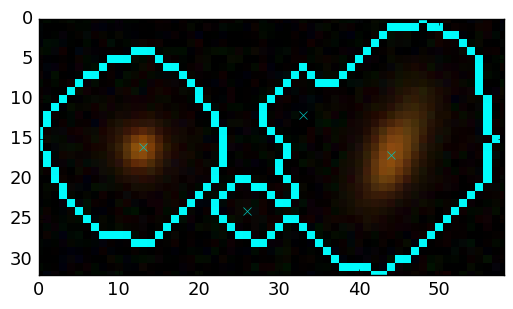

In [2]:
filters = ["HSC-G","HSC-R", "HSC-I","HSC-Z",'HSC-Y']
imgFilename = os.path.expandvars("$LSST/deblender/HSC-data/{0}-{1}-9615-2,4.fits")
catFilename = os.path.expandvars("$LSST/deblender/HSC-data/mergeDet-9615-2,4.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename)
#display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
condition = expDb.mergedTable["peaks"]==4
pidx = 12
#condition = (expDb.mergedTable["peaks"]>2) & (expDb.mergedTable["peaks"]<10)
footprint, peaks = expDb.getParentFootprint(parentIdx=pidx, condition=condition, contrast=1)
deblend = proximal.DeblendedParent(expDb, footprint, peaks)

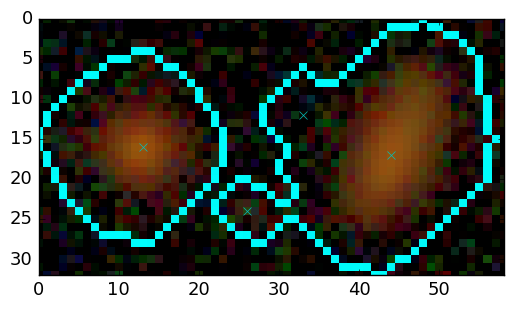

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:999 iterations
INFO:lsst.meas.deblender.proximal:Filter HSC-G
INFO:lsst.meas.deblender.proximal:Pixel range: -0.680445671082 to 4.53749418259
INFO:lsst.meas.deblender.proximal:Max difference: 5.24756791271
INFO:lsst.meas.deblender.proximal:Residual difference 916.6%
INFO:lsst.meas.deblender.proximal:Filter HSC-R
INFO:lsst.meas.deblender.proximal:Pixel range: -0.680445671082 to 4.53749418259
INFO:lsst.meas.deblender.proximal:Max difference: 1.20155811591
INFO:lsst.meas.deblender.proximal:Residual difference 68.6%
INFO:lsst.meas.deblender.proximal:Filter HSC-I
INFO:lsst.meas.deblender.proximal:Pixel range: -0.680445671082 to 4.53749418259
INFO:lsst.meas.deblender.proximal:Max difference: 1.77359314901
INFO:lsst.meas.deblender.proximal:Residual difference 52.7%
INFO:lsst.meas.deblender.proximal:Filter HSC-Z
INFO:lsst.meas.deblender.proximal:Pixel ran

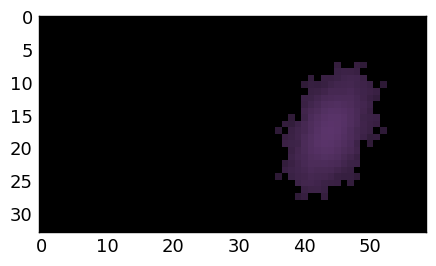

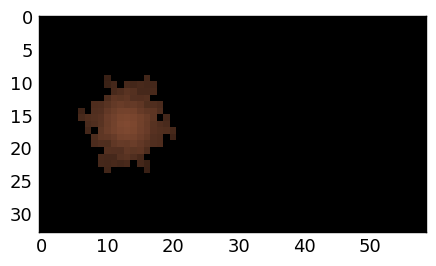

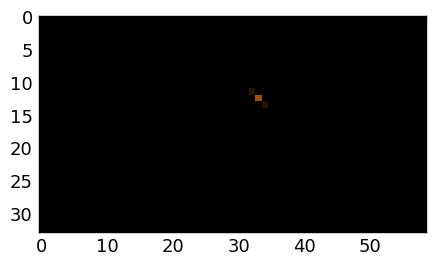

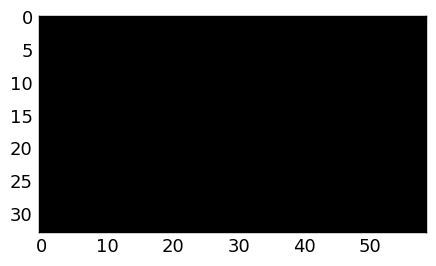

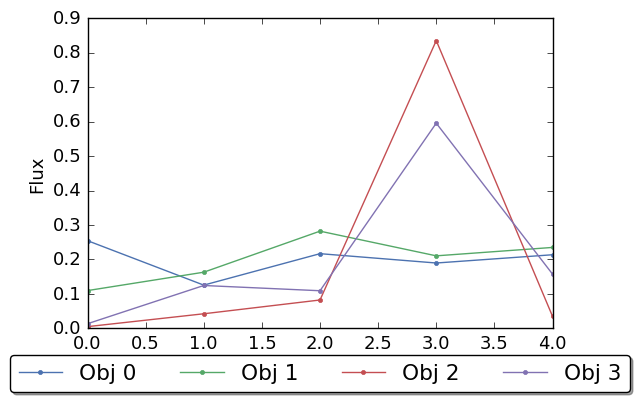

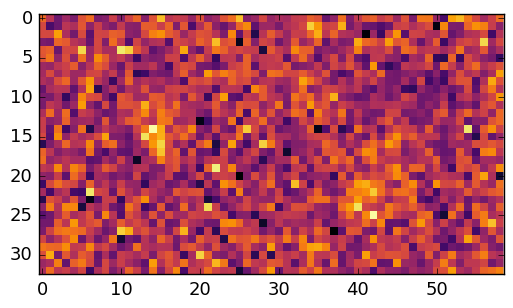

CPU times: user 8.57 s, sys: 305 ms, total: 8.87 s
Wall time: 8.88 s


In [3]:
%time sdmm = expDb.deblendParent(condition=condition, parentIdx=pidx, display=True, maxiter=1000, constraints='MS', nonSymmetricFill=0, algorithm="GLM", usePsf=False, psfThresh=3e-3, l0_thresh=.01)

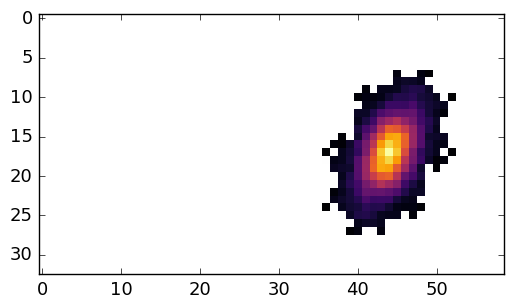

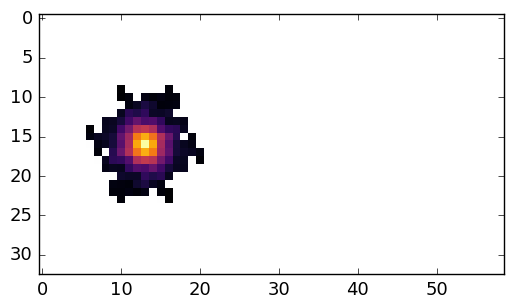

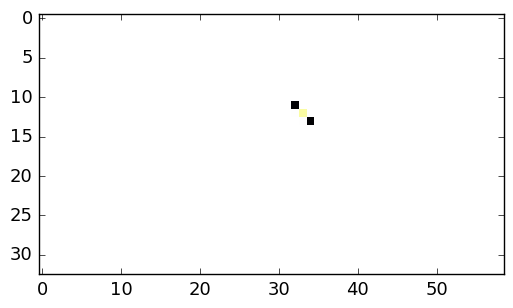

/Users/fred/lsst/code/lsstswig2/miniconda/lib/python2.7/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


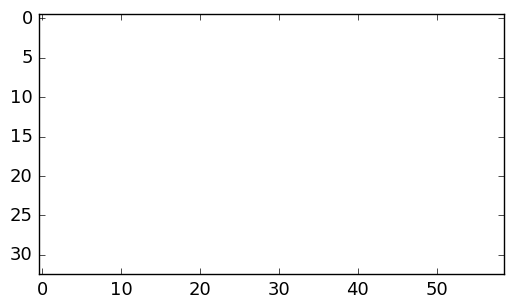

In [4]:
sdmm.displayAllImages(0)

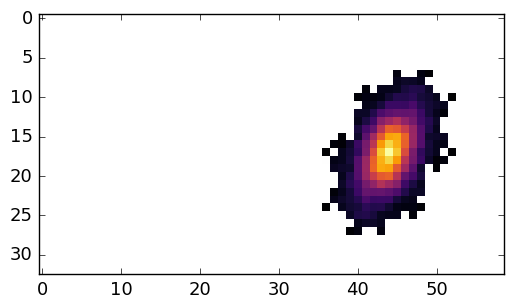

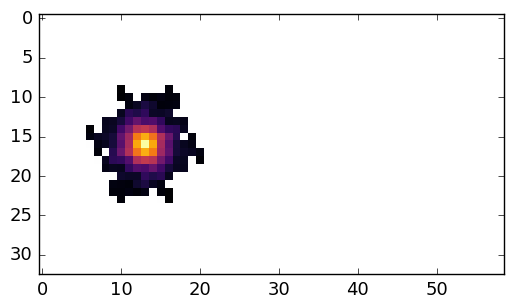

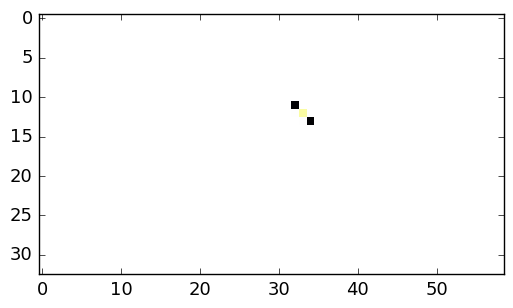

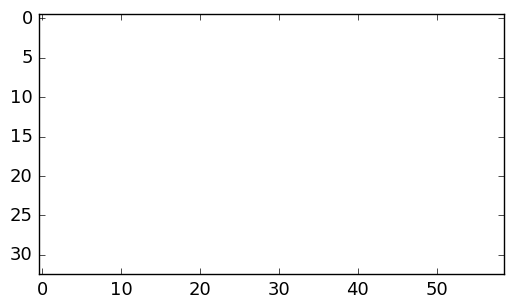

In [5]:
sdmm.displayAllImages(imgType='intensity')

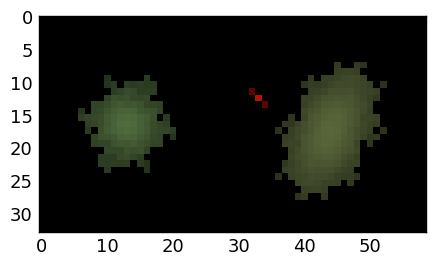

In [6]:
display.plotColorImage(sdmm.model, filterIndices=[3,2,1]);

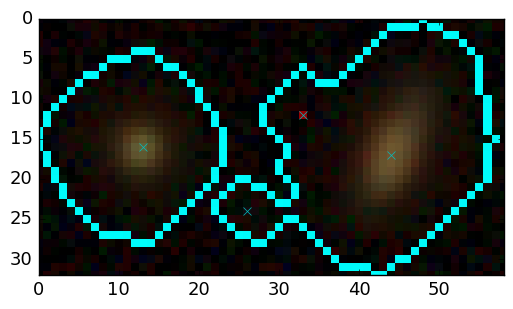

In [7]:
footprint, peaks = expDb.getParentFootprint(parentIdx=pidx, condition=condition, contrast=1, filterIndices=[3,2,1])

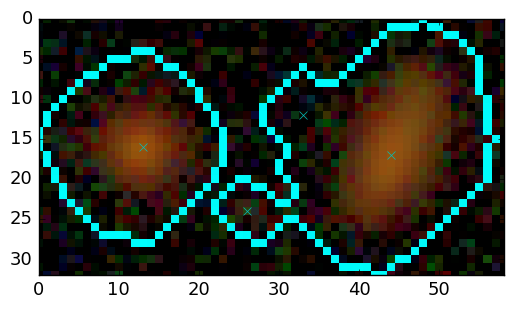

INFO:lsst.meas.deblender.proximal:constraints: M
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 55
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 40
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 47
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 59
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 58
INFO:lsst.meas.deblender.proximal_nmf:0 2.8031332135 199 10.7805460411 199 [1, 1, 1, 1]
INFO:lsst.meas.deblender.proximal_nmf:1 0.00762208514388 199 13.410027793 199 [97, 50, 73, 18]
INFO:lsst.meas.deblender.proximal_nmf:2 0.00429958695759 199 14.5853465686 199 [96, 50, 73, 12]
INFO:lsst.meas.deblender.proximal_nmf:3 0.00319090691275 199 15.5215012421 199 [96, 50, 37, 12]
INFO:lsst.meas.deblender.proximal_nmf:4 0.00270836175982 199 16.0598853613 199 [96, 50, 20, 12]
INFO:lsst.meas.deblender.proximal_nmf:5 0.00245864321197 199 16.34944223 199 [96, 50, 20, 12]
INFO:lsst.meas.deblender.proximal_nmf:6 0.00229639668896 199 16.4963809836 199 [96, 49, 16,

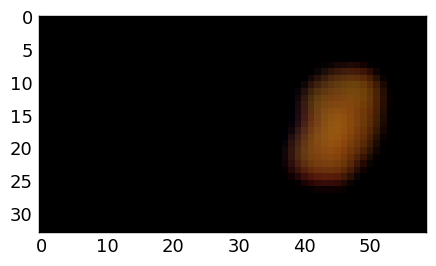

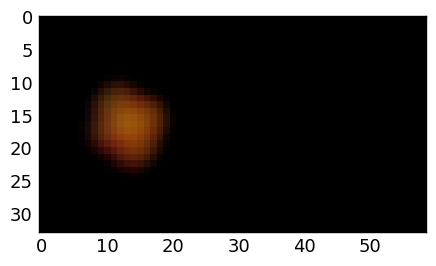

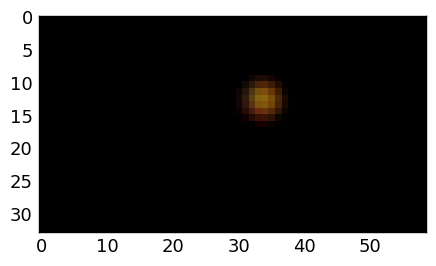

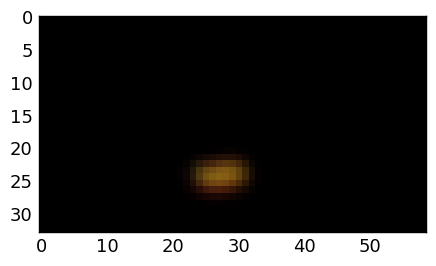

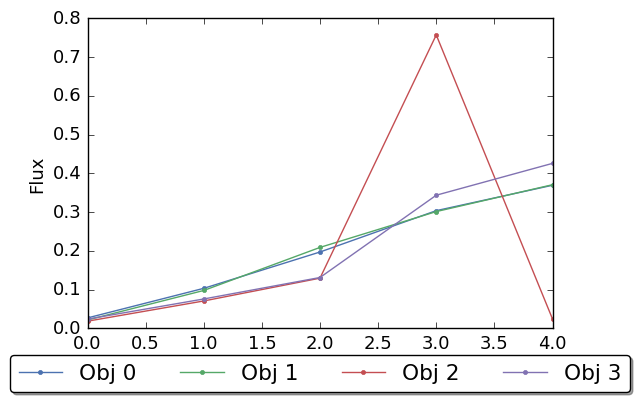

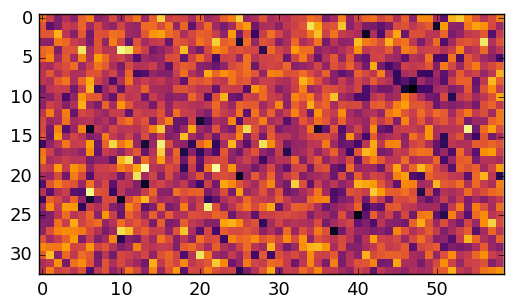

CPU times: user 28.6 s, sys: 290 ms, total: 28.9 s
Wall time: 28.9 s


In [18]:
%time admm = expDb.deblendParent(condition=condition, parentIdx=pidx, display=True, maxiter=200, constraints='M', nonSymmetricFill=0, algorithm="ADMM", usePsf=True, psfThresh=3e-3, l0_thresh=.02)

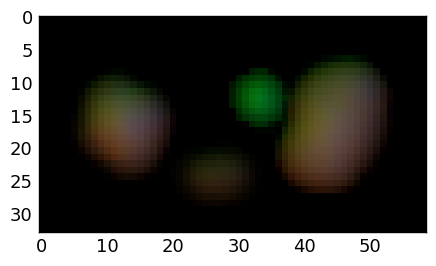

In [22]:
display.plotColorImage(admm.model, filterIndices=[4,3,2]);

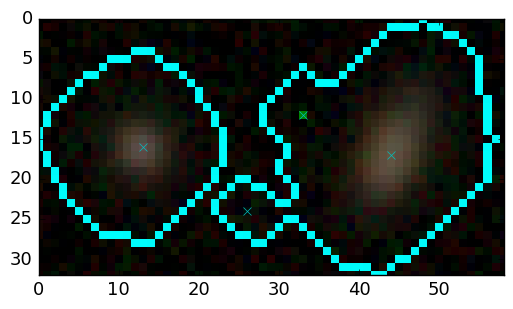

In [21]:
footprint, peaks = expDb.getParentFootprint(parentIdx=pidx, condition=condition, contrast=1, filterIndices=[4,3,2])